# Apunte Transformadas de Laplace

+ Pequeño recordatorio de las transformadas y cómo aplicar la antitransformada utilizando python

### Definición

La Transformada de Laplace es una herramienta matemática que permite transformar funciones definidas en el dominio del tiempo $t$ hacian el dominio de las frecuencias complejas $p$. Esto facilita el análisis y la resolución de ecuaciones diferenciales.

Entonces la expresión de la Transformada de Laplace de una función $f_{(t)}$ se expresa como:
$$
\mathcal{L}\left\{f_{(t)}\cdot H_{(t)}\right\}=F_{(p)}=\int_{-\infty}^{+\infty} f_{(t)}H_{(t)}e^{-pt}dt
$$


La función escalón de Heaviside, $H_{(t)}$ representa un cambio repentino en el tiempo, de esta manera se describe cuando la función deja de ser nula. Se define como:

$$
H_{(t)}=\begin{cases} 0, \; t<0 \\ 1, \; t\geq 0\end{cases}
$$

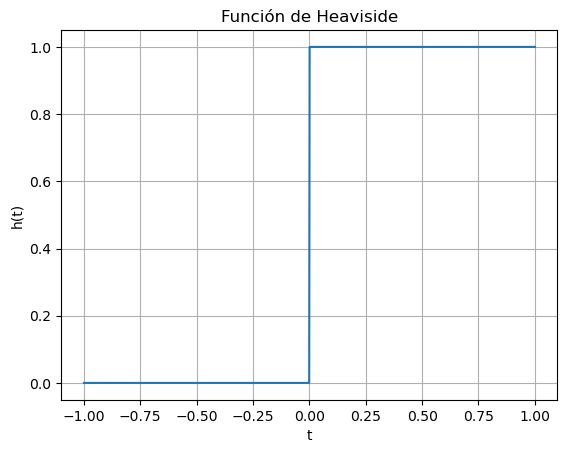

In [1]:
# Grafico de función de Heaviside
import numpy as np
import matplotlib.pyplot as plt

def h(t):
    return 1 if t >= 0 else 0

t = np.linspace(-1, 1, 1000)
h = np.vectorize(h)
plt.plot(t, h(t))
plt.title('Función de Heaviside')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid()
plt.show()


## Transformadas Elementales

1) **Heaviside**

$$
f_{(t)}=H_{(t)} \implies \mathcal{L}\left\{\right\}=\frac{1}{p}
$$

2) **Exponenciales**

$$
f_{(t)}=e^{at}H_{(t)} \implies \mathcal{L}\left\{\right\}=\frac{1}{p-a}
$$
$$
f_{(t)}=e^{-at}H_{(t)} \implies \mathcal{L}\left\{\right\}=\frac{1}{p+a}
$$
$$
f_{(t)}=e^{iat}H_{(t)} \implies \mathcal{L}\left\{\right\}=\frac{1}{p-ia}
$$
$$
f_{(t)}=e^{-iat}H_{(t)} \implies \mathcal{L}\left\{\right\}=\frac{1}{p+ia}
$$

3) **Trigonométricas**

$$
f_{(t)}=sen(at)H_{(t)} \implies \mathcal{L}\left\{\right\}=\frac{a}{p^2+a^2}
$$
$$
f_{(t)}=cos(at)H_{(t)} \implies \mathcal{L}\left\{\right\}=\frac{p}{p^2+a^2}
$$

4) **Polinómicas**

$$
f_{(t)}=t^{n}H_{(t)} \implies \mathcal{L}\left\{\right\}=\frac{n!}{p^{n+1}}
$$

## Propiedades

+ Derivada de la original

$$\mathcal{L}\left\{ f_{(t)}^{(n)}\right\}=p^{n}F_{p}-\sum_{i=1}^{n}p^{n-i}\:F_{(0+)}^{(i-1)}$$

In [2]:
#Calculo de la antitransformada de Laplace
import sympy as sp
from sympy.integrals.transforms import inverse_laplace_transform
from IPython.display import display, Math

#Defino las letras s y t como símbolos
s, t = sp.symbols('s t')
#Función de ejemplo F(S)
F = 1/(s**2+1)

#Calculo la antitransformada de Laplace
f = inverse_laplace_transform(F, s, t)

#Muestro el resultado
display(Math(r'\mathcal{L}^{-1}\left\{F(s)\right\} = ' + sp.latex(f)))


<IPython.core.display.Math object>

In [7]:
import sympy as sp
from IPython.display import display, Math

def resolver_ecuacion_diferencial(equacion, mostrar_pasos=True):
    # Defino las variables y la función
    t, s = sp.symbols('t s')
    y = sp.Function('y')(t)
    
    # Mostrar la ecuación diferencial original
    
    display(Math(r'\text{Ecuación diferencial original:}'))
    display(Math(sp.latex(equacion)))
    
    # Aplicar la transformada de Laplace a ambos lados de la ecuación
    L_diff = sp.laplace_transform(equacion.lhs, t, s)[0]
    R_diff = sp.laplace_transform(equacion.rhs, t, s)[0]
    
    # Mostrar la ecuación diferencial transformada
    if mostrar_pasos:
        display(Math(r'\text{Ecuación diferencial transformada:}'))
        display(Math(sp.latex(L_diff) + ' = ' + sp.latex(R_diff)))
    
    # Resuelvo la ecuación transformada
    Y = sp.solve(L_diff - R_diff, sp.laplace_transform(y, t, s))[0]
    
    # Mostrar la solución de la ecuación transformada
    if mostrar_pasos:
        display(Math(r'\text{Ahora tenemos una ecuación lineal, despejamos } \mathcal{L}^{}\left\{y(t)\right\}'))
        display(Math(r'\text{Solución de la ecuación transformada:}'))
        display(Math(r'\mathcal{L}^{}\left\{y(t)\right\}  = ' + sp.latex(Y[0])))
    else:
        display(Math(r'\text{Solución de la ecuación transformada:}'))
        display(Math(r'\mathcal{L}^{}\left\{y(t)\right\}  = ' + sp.latex(Y[0])))
    return Y

# Ejemplo de uso
t, s = sp.symbols('t s')
y = sp.Function('y')(t)
dy = y.diff(t)
ddy=dy.diff(t)
diff_eq = sp.Eq(ddy + dy + 5*y, 2*sp.exp(-t))

# Llamar a la función con la ecuación diferencial y mostrar los pasos
solucion = resolver_ecuacion_diferencial(diff_eq, mostrar_pasos=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>